<a href="https://githubtocolab.com/Astolfo2332/ICFES_pro_prediction/Final_proyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

<div style="display: flex; align-items: center;">
    <div>
        <h2>Actividad final portafolio</h2>
        <h2>Miguel López</h2>
        <h2>ID 1001014378</h2>
    </div>
    <img src="https://yt3.ggpht.com/-10IUL9wra6k/AAAAAAAAAAI/AAAAAAAAAAA/UOBLu1uYOOE/s900-c-k-no/photo.jpg" alt="Image description" width="200" style="margin-left: 20px;"/>
</div>

## 0. Obtención de datos

### 0.1 Por medio de Kaggle (recomendado)

- Se debe tener una cuenta de Kaggle.
- Descargar el token de acceso a traves de la pagina.
- Crear una carpeta padre en la ubicación home de os llamada "./kaggle" . (este proceso se automatiza en este notebook solo es necesario tener el kaggle.json en la carpeta kaggle, aunque solo en entornos basados en UNIX)

A traves de el api de kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle/kaggle.json ~/.kaggle/
!kaggle competitions download -c udea-ai4eng-20242
!unzip udea-ai4eng-20242.zip
!mkdir data
!mv *.csv data/

### 0.2 A traves del One Drive de la universidad

En construcción

## 1. Exploración de la información

### 1.1 Carga de datos 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("data/train.csv")
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


### 1.1.1 Histogramas basados en grupos

In [16]:
def plot1(df, column, target, title="Frecuencia de valores con respecto al target"):
    plt.figure(figsize=(16, 12))
    sns.countplot(x=column, data=df, hue=target)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45) 
    plt.legend(title=target)
    plt.show()

In [5]:
estrato_order = ['Sin Estrato','Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6']
df['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(df['FAMI_ESTRATOVIVIENDA'], categories=estrato_order, ordered=True)

In [6]:
df["RENDIMIENTO_GLOBAL"].value_counts()

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64

In [7]:
target_order = ["bajo", "medio-bajo", "medio-alto", "alto"]
df["RENDIMIENTO_GLOBAL"] = pd.Categorical(df["RENDIMIENTO_GLOBAL"], categories=target_order, ordered=True)

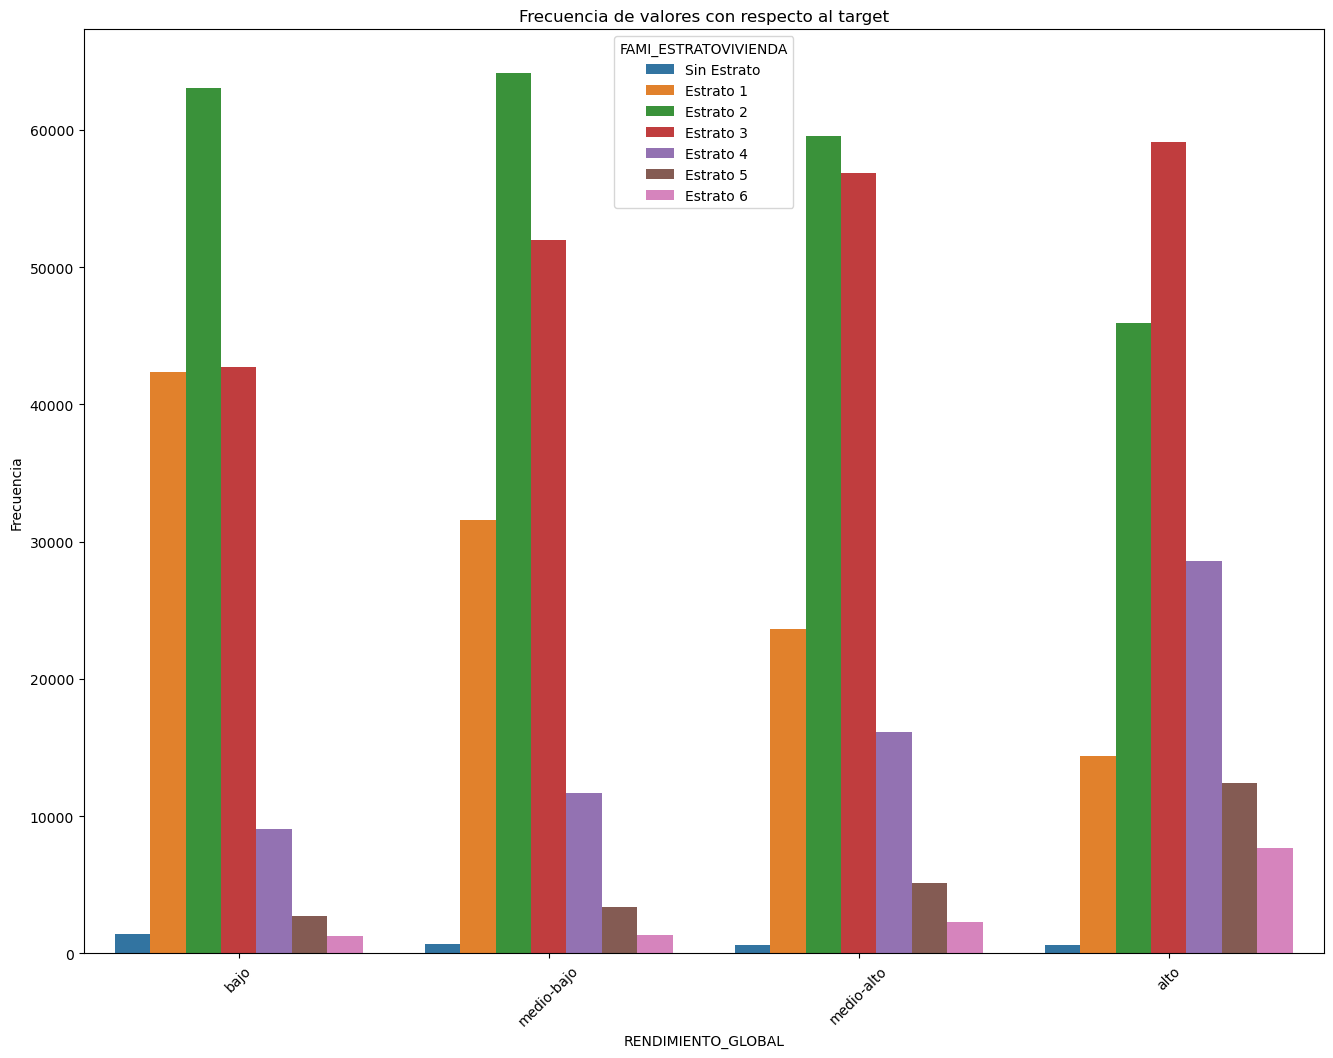

In [17]:
plot1(df, "RENDIMIENTO_GLOBAL", "FAMI_ESTRATOVIVIENDA", "Frecuencia de valores con respecto al target")